<a href="https://colab.research.google.com/github/manolopajaroborras/soloPython/blob/main/retoNo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En Python, hacer captura de video (requiere cámara del portátil o externa)
Punto_1:Buscar imagen a color (puede ser cualquiera, preferiblemente con gran variedad de colores) en este caso capture la imagen por consola

In [ ]:
from google.colab import files
import cv2
import io
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Leer como imagen a color en OpenCV (se recomienda uso de Google Colab leyendo imagen desde archivo almacenado en drive)

In [ ]:
uploaded = files.upload()

for filename in uploaded.keys():
    img = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)
    print(f"Imagen '{filename}' cargada exitosamente.")

Saving img2.jpg to img2.jpg
Imagen 'img2.jpg' cargada exitosamente.


Imprimir forma (shape) de la imagen

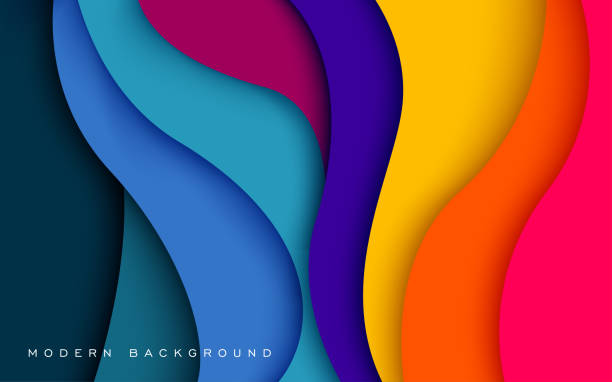

In [ ]:
    # mostrando la imagen:
    cv2_imshow(img)

Extraer 5 zonas o regiones de interés homogéneas de algún color, cualquiera, usando inspección visual y definiendo las cotas. Pueden ser regiones de 10x10 pixeles o más grandes, pero buscando que sean más o menos homogéneas.
Definir una región 6, pero en este caso que no sea homogénea, sino que tenga mezcla de
varios colores.

In [ ]:
import cv2
import numpy as np
# from google.colab.patches import cv2_imshow # Assuming this is already imported

# Crea una copia de la imagen original para dibujar los recuadros
# Asegúrate de que la variable 'img' esté disponible desde una celda anterior
if 'img' in locals():
    img_with_rectangles = img.copy()

    # --- Dibujar recuadros para las 5 ROIs homogéneas ---
    # Assuming the 'rois' list and 'get_roi_coordinates' function are available
    if 'rois' in locals() and rois and 'get_roi_coordinates' in locals():
        print("Introduce las coordenadas para dibujar los recuadros de las 5 ROIs homogéneas:")
        homogeneous_roi_coords = []
        for i in range(1, 6): # Get coordinates for 5 homogeneous ROIs
             y_inicial, y_final, x_inicial, x_final = get_roi_coordinates(i, img.shape)
             homogeneous_roi_coords.append(((x_inicial, y_inicial), (x_final, y_final))) # Store as tuples of points

             # Dibujar rectángulo: cv2.rectangle(imagen, punto_inicial, punto_final, color, grosor)
             # Usaremos color verde (0, 255, 0) para las ROIs homogéneas
             cv2.rectangle(img_with_rectangles, (x_inicial, y_inicial), (x_final, y_final), (0, 255, 0), 2)
             # Opcional: poner texto para identificar la ROI
             cv2.putText(img_with_rectangles, f'ROI {i}', (x_inicial, y_inicial - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
    else:
        print("La lista 'rois' o la función 'get_roi_coordinates' no están disponibles. Asegúrate de haber ejecutado las celdas anteriores.")


    # --- Dibujar recuadro para la 6ta ROI (no homogénea) ---
    if 'get_roi_coordinates' in locals():
        print("\nIntroduce las coordenadas para la ROI 6 (No homogénea):")
        y_inicial_6, y_final_6, x_inicial_6, x_final_6 = get_roi_coordinates(6, img.shape) # Get coordinates for the 6th ROI

        # Dibujar rectángulo para la ROI 6
        # Usaremos color rojo (0, 0, 255) para la ROI no homogénea
        cv2.rectangle(img_with_rectangles, (x_inicial_6, y_inicial_6), (x_final_6, y_final_6), (0, 0, 255), 2)
        # Opcional: poner texto para identificar la ROI
        cv2.putText(img_with_rectangles, 'ROI 6 (No Homogenea)', (x_inicial_6, y_inicial_6 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
    else:
         print("La función 'get_roi_coordinates' no está disponible. Asegúrate de haber ejecutado las celdas anteriores.")

    # Mostrar la imagen con los recuadros dibujados
    print("\nImagen con recuadros dibujados:")
    cv2_imshow(img_with_rectangles)

else:
    print("La variable 'img' no está disponible. Asegúrate de haber cargado la imagen.")

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import json # Import the json library

# nos indica el ancho y largo de la imagen seleccionada
print("Dimensiones de la imagen (alto, ancho, canales):", img.shape)
print("Número de filas (alto):", img.shape[0])
print("Número de columnas (ancho):", img.shape[1])

# Función para obtener las coordenadas de una ROI desde la consola con validación
def get_roi_coordinates(roi_number, img_shape):
    print(f"\nIntroduce las coordenadas para la ROI {roi_number}:")
    while True:
        try:
            y_inicial = int(input("Digita la Fila inicial Y Inicial): ").strip())
            y_final =   int(input("Digita la Fila final  Y Final   ): ").strip())
            x_inicial = int(input("Digita la Columna inicial X Inicial): ").strip())
            x_final =   int(input("Digita la Columna final   X   final): ").strip())

            # Valida que las coordenadas estén dentro de los límites de la imagen
            # y que las coordenadas finales sean mayores que las iniciales
            if (0 <= y_inicial < img_shape[0] and 0 <= y_final <= img_shape[0] and
                0 <= x_inicial < img_shape[1] and 0 <= x_final <= img_shape[1] and # Corrected: x_final should be <= img_shape[1]
                y_inicial < y_final and x_inicial < x_final):
                return y_inicial, y_final, x_inicial, x_final
            else:
                print("Coordenadas inválidas. Asegúrate de que estén dentro de los límites de la imagen y que y_final > y_inicial y x_final > x_inicial.")
        except ValueError:
            print("Entrada inválida. Asegúrate de ingresar solo números enteros.")

# se crea una Lista para almacenar las ROIs que se lograron extraer
rois = []
roi_coordinates = {} # Dictionary to store ROI coordinates

# Extraer 5 ROIs (homogéneas) y trabajar utilizando sus coordenadas
print("Define las coordenadas para las 5 ROIs homogéneas:")
for i in range(1, 6):
    y_inicial, y_final, x_inicial, x_final = get_roi_coordinates(i, img.shape)

    # Trabajando con las coordenadas seleccionada
    roi_coordinates[f"ROI_{i}"] = {
        "y_inicial": y_inicial,
        "y_final": y_final,
        "x_inicial": x_inicial,
        "x_final": x_final
    }

    # Extraer la ROI (ya validada dentro de la función get_roi_coordinates)
    roi = img[y_inicial:y_final, x_inicial:x_final]
    rois.append(roi)

# Get coordinates for the 6th (non-homogeneous) ROI and store them
print("\nDefine las coordenadas para la ROI 6 (No homogénea):")
y_inicial_6, y_final_6, x_inicial_6, x_final_6 = get_roi_coordinates(6, img.shape)
roi_coordinates["ROI_6"] = {
    "y_inicial": y_inicial_6,
    "y_final": y_final_6,
    "x_inicial": x_inicial_6,
    "x_final": x_final_6
}

# Save the coordinates to a JSON file
json_filename = "roi_coordinates.json"
with open(json_filename, 'w') as f:
    json.dump(roi_coordinates, f, indent=4)

print(f"\nCoordenadas de las ROIs (1-6) guardadas en '{json_filename}'")


# Now the list 'rois' contains the 5 extracted ROIs (ROI 1-5)
# we can access them with rois[0] for the first, rois[1], and so on

# Display all 5 extracted ROIs at the end one beside the other with space
if rois:
    print("\nMostrando las 5 ROIs homogéneas extraídas (una al lado de la otra con espacio):")
    # Find the maximum height among the ROIs for consistent display
    max_height = max(roi.shape[0] for roi in rois)

    # Define the width of the spacing strip
    spacing_width = 10 # You can adjust this value

    # Create a spacing strip (black color, same height as max_height)
    spacing_strip = np.zeros((max_height, spacing_width, 3), dtype=np.uint8) # 3 channels for color image

    # Resize ROIs to the maximum height and concatenate horizontally with spacing
    concatenated_rois_with_spacing = []
    for i, roi in enumerate(rois):
        resized_roi = cv2.resize(roi, (int(roi.shape[1] * max_height / roi.shape[0]), max_height))
        concatenated_rois_with_spacing.append(resized_roi)
        if i < len(rois) - 1: # Add spacing after each ROI except the last one
            concatenated_rois_with_spacing.append(spacing_strip)

    concatenated_rois = np.hstack(concatenated_rois_with_spacing)

    cv2_imshow(concatenated_rois)
else:
    print("\nNo se pudieron extraer las 5 ROIs homogéneas.") # Esto solo ocurriría si el bucle no se ejecuta por alguna razón

Dimensiones de la imagen (alto, ancho, canales): (382, 612, 3)
Número de filas (alto): 382
Número de columnas (ancho): 612
Define las coordenadas para las 5 ROIs homogéneas:

Introduce las coordenadas para la ROI 1:

Introduce las coordenadas para la ROI 2:

Introduce las coordenadas para la ROI 3:


Dibujar un recuadro sobre las 6 regiones de interés seleccionadas

In [ ]:
import cv2
import numpy as np
# from google.colab.patches import cv2_imshow # Assuming this is already imported

# Crea una copia de la imagen original para dibujar los recuadros
# Asegúrate de que la variable 'img' esté disponible desde una celda anterior
if 'img' in locals():
    img_with_rectangles = img.copy()

    # --- Dibujar recuadros para las 5 ROIs homogéneas ---
    # Assuming the 'rois' list and 'get_roi_coordinates' function are available
    if 'rois' in locals() and rois and 'get_roi_coordinates' in locals():
        print("Introduce las coordenadas para dibujar los recuadros de las 5 ROIs homogéneas:")
        homogeneous_roi_coords = []
        for i in range(1, 6): # Get coordinates for 5 homogeneous ROIs
             y_inicial, y_final, x_inicial, x_final = get_roi_coordinates(i, img.shape)
             homogeneous_roi_coords.append(((x_inicial, y_inicial), (x_final, y_final))) # Store as tuples of points

             # Dibujar rectángulo: cv2.rectangle(imagen, punto_inicial, punto_final, color, grosor)
             # Usaremos color verde (0, 255, 0) para las ROIs homogéneas
             cv2.rectangle(img_with_rectangles, (x_inicial, y_inicial), (x_final, y_final), (0, 255, 0), 2)
             # Opcional: poner texto para identificar la ROI
             cv2.putText(img_with_rectangles, f'ROI {i}', (x_inicial, y_inicial - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
    else:
        print("La lista 'rois' o la función 'get_roi_coordinates' no están disponibles. Asegúrate de haber ejecutado las celdas anteriores.")


    # --- Dibujar recuadro para la 6ta ROI (no homogénea) ---
    if 'get_roi_coordinates' in locals():
        print("\nIntroduce las coordenadas para la ROI 6 (No homogénea):")
        y_inicial_6, y_final_6, x_inicial_6, x_final_6 = get_roi_coordinates(6, img.shape) # Get coordinates for the 6th ROI

        # Dibujar rectángulo para la ROI 6
        # Usaremos color rojo (0, 0, 255) para la ROI no homogénea
        cv2.rectangle(img_with_rectangles, (x_inicial_6, y_inicial_6), (x_final_6, y_final_6), (0, 0, 255), 2)
        # Opcional: poner texto para identificar la ROI
        cv2.putText(img_with_rectangles, 'ROI 6 (No Homogenea)', (x_inicial_6, y_inicial_6 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
    else:
         print("La función 'get_roi_coordinates' no está disponible. Asegúrate de haber ejecutado las celdas anteriores.")

    # Mostrar la imagen con los recuadros dibujados
    print("\nImagen con recuadros dibujados:")
    cv2_imshow(img_with_rectangles)

else:
    print("La variable 'img' no está disponible. Asegúrate de haber cargado la imagen.")

Redimensionar las regiones de interés y mostrarlas en un tamaño más grande que facilite la inspección visual

def de roi:

Mostrando ROIs redimensionadas para una mejor inspección visual:
ROI 1 (redimensionada):


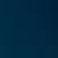

ROI 2 (redimensionada):


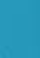

ROI 3 (redimensionada):


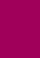

ROI 4 (redimensionada):


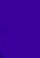

ROI 5 (redimensionada):


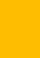

In [ ]:
# Definir un factor de escala para redimensionar las ROIs
scale_factor = 2 # Puedes ajustar este valor según tu preferencia

print("Mostrando ROIs redimensionadas para una mejor inspección visual:")

# Iterar sobre la lista de ROIs extraídas
# Asegúrate de que la lista 'rois' esté disponible desde una celda anterior
if 'rois' in locals() and rois:
    for i, roi in enumerate(rois):
        # Obtener las dimensiones actuales de la ROI
        height, width, _ = roi.shape

        # Calcular las nuevas dimensiones
        new_width = int(width * scale_factor)
        new_height = int(height * scale_factor)

        # Redimensionar la ROI
        resized_roi = cv2.resize(roi, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

        print(f"ROI {i+1} (redimensionada):")
        cv2_imshow(resized_roi)
else:
    print("La lista 'rois' no está disponible o está vacía. Asegúrate de haber ejecutado la celda donde se extraen las ROIs.")

Obtener la media de cada uno de los 3 canales RGB en estas regiones de interés

In [ ]:
# Asegúrate de que la lista 'rois' esté disponible desde una celda anterior
if 'rois' in locals() and rois:
    print("Calculando la media de los canales RGB para cada ROI:")
    for i, roi in enumerate(rois):
        # Calcular la media de cada canal (BGR en OpenCV por defecto)
        # roi.mean(axis=(0, 1)) calcula la media sobre los ejes de altura y ancho
        mean_bgr = roi.mean(axis=(0, 1))

        # Los canales en OpenCV están en orden BGR (Azul, Verde, Rojo)
        mean_blue = mean_bgr[0]
        mean_green = mean_bgr[1]
        mean_red = mean_bgr[2]

        print(f"ROI {i+1}:")
        print(f"  Media Canal Azul (B): {mean_blue:.2f}")
        print(f"  Media Canal Verde (G): {mean_green:.2f}")
        print(f"  Media Canal Rojo (R): {mean_red:.2f}")
else:
    print("La lista 'rois' no está disponible o está vacía. Asegúrate de haber ejecutado la celda donde se extraen las ROIs.")

Calculando la media de los canales RGB para cada ROI:
ROI 1:
  Media Canal Azul (B): 65.41
  Media Canal Verde (G): 41.04
  Media Canal Rojo (R): 1.07
ROI 2:
  Media Canal Azul (B): 186.13
  Media Canal Verde (G): 152.13
  Media Canal Rojo (R): 38.21
ROI 3:
  Media Canal Azul (B): 90.00
  Media Canal Verde (G): 0.00
  Media Canal Rojo (R): 160.00
ROI 4:
  Media Canal Azul (B): 155.70
  Media Canal Verde (G): 0.99
  Media Canal Rojo (R): 57.93
ROI 5:
  Media Canal Azul (B): 1.00
  Media Canal Verde (G): 189.00
  Media Canal Rojo (R): 254.00


Obtener la desviación estándar de cada uno de los 3 canales de las mismas regiones

In [ ]:
# Asegúrate de que la lista 'rois' esté disponible desde una celda anterior
if 'rois' in locals() and rois:
    print("Calculando la desviación estándar de los canales RGB para cada ROI:")
    for i, roi in enumerate(rois):
        # Calcular la desviación estándar de cada canal (BGR en OpenCV por defecto)
        # roi.std(axis=(0, 1)) calcula la desviación estándar sobre los ejes de altura y ancho
        std_bgr = roi.std(axis=(0, 1))

        # Los canales en OpenCV están en orden BGR (Azul, Verde, Rojo)
        std_blue = std_bgr[0]
        std_green = std_bgr[1]
        std_red = std_bgr[2]

        print(f"ROI {i+1}:")
        print(f"  Desviación Estándar Canal Azul (B): {std_blue:.2f}")
        print(f"  Desviación Estándar Canal Verde (G): {std_green:.2f}")
        print(f"  Desviación Estándar Canal Rojo (R): {std_red:.2f}")
else:
    print("La lista 'rois' no está disponible o está vacía. Asegúrate de haber ejecutado la celda donde se extraen las ROIs.")

Calculando la desviación estándar de los canales RGB para cada ROI:
ROI 1:
  Desviación Estándar Canal Azul (B): 2.79
  Desviación Estándar Canal Verde (G): 3.39
  Desviación Estándar Canal Rojo (R): 0.99
ROI 2:
  Desviación Estándar Canal Azul (B): 1.06
  Desviación Estándar Canal Verde (G): 1.06
  Desviación Estándar Canal Rojo (R): 1.01
ROI 3:
  Desviación Estándar Canal Azul (B): 0.00
  Desviación Estándar Canal Verde (G): 0.00
  Desviación Estándar Canal Rojo (R): 0.00
ROI 4:
  Desviación Estándar Canal Azul (B): 3.19
  Desviación Estándar Canal Verde (G): 0.22
  Desviación Estándar Canal Rojo (R): 1.28
ROI 5:
  Desviación Estándar Canal Azul (B): 0.00
  Desviación Estándar Canal Verde (G): 0.00
  Desviación Estándar Canal Rojo (R): 0.00


In [ ]:
# Asegúrate de que la lista 'rois' esté disponible desde una celda anterior
# Asegúrate de haber ejecutado las celdas para calcular la media y desviación estándar

if 'rois' in locals() and rois:
    print("Análisis basado en la media y desviación estándar de las ROIs:")
    for i, roi in enumerate(rois):
        # Obtener la media y desviación estándar (asumiendo que ya se calcularon y están disponibles,
        # o recalcularlas aquí si no lo están)
        mean_bgr = roi.mean(axis=(0, 1))
        std_bgr = roi.std(axis=(0, 1))

        mean_blue, mean_green, mean_red = mean_bgr[0], mean_bgr[1], mean_bgr[2]
        std_blue, std_green, std_red = std_bgr[0], std_bgr[1], std_bgr[2]

        print(f"\nAnálisis para ROI {i+1}:")
        print(f"  Media (B, G, R): ({mean_blue:.2f}, {mean_green:.2f}, {mean_red:.2f})")
        print(f"  Desviación Estándar (B, G, R): ({std_blue:.2f}, {std_green:.2f}, {std_red:.2f})")

        # --- Análisis del Color Predominante (basado en valores medios) ---
        # Esto es una simplificación y puede no ser exacto para todos los colores
        if mean_red > mean_blue and mean_red > mean_green:
            predominant_color = "Rojo"
        elif mean_green > mean_blue and mean_green > mean_red:
            predominant_color = "Verde"
        elif mean_blue > mean_red and mean_blue > mean_green:
            predominant_color = "Azul"
        elif mean_red > 200 and mean_green > 200 and mean_blue > 200:
             predominant_color = "Blanco o muy claro"
        elif mean_red < 50 and mean_green < 50 and mean_blue < 50:
             predominant_color = "Negro o muy oscuro"
        else:
            predominant_color = "Mezcla de colores o color intermedio"

        print(f"  Color predominante (estimado): {predominant_color}")

        # --- Análisis de Homogeneidad (basado en desviación estándar) ---
        # Puedes ajustar estos umbrales según lo que consideres "homogéneo"
        homogeneity_threshold = 15 # Ejemplo de umbral: si la desviación estándar es menor que 15, consideramos homogéneo

        if std_blue < homogeneity_threshold and std_green < homogeneity_threshold and std_red < homogeneity_threshold:
            homogeneity_status = "Parece homogénea"
        else:
            homogeneity_status = "Parece no homogénea"

        print(f"  Homogeneidad: {homogeneity_status}")

else:
    print("La lista 'rois' no está disponible o está vacía. Asegúrate de haber ejecutado las celdas anteriores para extraer las ROIs.")

Análisis basado en la media y desviación estándar de las ROIs:

Análisis para ROI 1:
  Media (B, G, R): (65.41, 41.04, 1.07)
  Desviación Estándar (B, G, R): (2.79, 3.39, 0.99)
  Color predominante (estimado): Azul
  Homogeneidad: Parece homogénea

Análisis para ROI 2:
  Media (B, G, R): (186.13, 152.13, 38.21)
  Desviación Estándar (B, G, R): (1.06, 1.06, 1.01)
  Color predominante (estimado): Azul
  Homogeneidad: Parece homogénea

Análisis para ROI 3:
  Media (B, G, R): (90.00, 0.00, 160.00)
  Desviación Estándar (B, G, R): (0.00, 0.00, 0.00)
  Color predominante (estimado): Rojo
  Homogeneidad: Parece homogénea

Análisis para ROI 4:
  Media (B, G, R): (155.70, 0.99, 57.93)
  Desviación Estándar (B, G, R): (3.19, 0.22, 1.28)
  Color predominante (estimado): Azul
  Homogeneidad: Parece homogénea

Análisis para ROI 5:
  Media (B, G, R): (1.00, 189.00, 254.00)
  Desviación Estándar (B, G, R): (0.00, 0.00, 0.00)
  Color predominante (estimado): Rojo
  Homogeneidad: Parece homogénea


Analizar resultados y obtener algunas conclusiones (redactar), especialmente haciendo
énfasis en los indicadores matemáticos y estadísticos obtenidos y la inspección visual
realizada en dichas zonas.